In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import json
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import regex as re
from textblob import TextBlob
import unidecode
import itertools

In [3]:
# Download Wordnet through NLTK in python console:
import nltk
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize


import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

import nltk
#nltk.download('punkt')

import string



In [4]:

json_file = 'C:\OCR\HTW_Project\Tweets\tweets.json'

In [5]:
tweet = pd.read_json('C:\\CompletePython\\DataScience\\tweets\\tweets_json.json')

In [6]:
tweet.head()

,source_created_at,author_id,text,source,language,longitude,latitude,id,labels,source_id
0,2020-09-18 21:56:20.798,593731316,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,{'topic': [{'tweet_id': 'acd7673f-e621-5f1a-d6...,NaN
1,2020-10-13 07:31:53.122,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,en,-0.12574,51.50853,5b92aba8-4b05-6c63-8485-e9c870742137,{'topic': [{'tweet_id': '5b92aba8-4b05-6c63-84...,NaN
2,2020-10-26 19:27:24.695,303134761,@SW_Help .And yet you have no toilets on some ...,sprinklr,en,-0.12574,51.50853,0a799c07-8b76-17ba-b840-e538d51e832d,{'topic': [{'tweet_id': '0a799c07-8b76-17ba-b8...,NaN
3,2020-10-26 19:28:49.281,303134761,@SW_Help you have no toilets on some of your t...,sprinklr,en,-0.12574,51.50853,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,{'topic': [{'tweet_id': '8b4d2a34-c4f0-0e19-40...,NaN
4,2020-09-28 11:59:41.212,56427671,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,sprinklr,en,-1.09125,50.79899,1fd08862-d8c7-0682-6b11-2603fba22d94,{'topic': [{'tweet_id': '1fd08862-d8c7-0682-6b...,NaN


### Data Understanding

In [7]:
# CHECK ALL COLUMNS OF DATAFRAME:
print(tweet.columns)

Index(['source_created_at', 'author_id', 'text', 'source', 'language',
       'longitude', 'latitude', 'id', 'labels', 'source_id'],
      dtype='object')


In [8]:
# SHAPE OF DATAFRAME:
print(tweet.shape)

(16949, 10)


In [9]:
# STATISTIC INFO OF ALL COLUMN's DATAFRAME:
print(tweet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16949 entries, 0 to 16948
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   source_created_at  16949 non-null  datetime64[ns]
 1   author_id          16949 non-null  object        
 2   text               16949 non-null  object        
 3   source             16949 non-null  object        
 4   language           16949 non-null  object        
 5   longitude          1425 non-null   float64       
 6   latitude           1425 non-null   float64       
 7   id                 16949 non-null  object        
 8   labels             16949 non-null  object        
 9   source_id          15548 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 1.3+ MB
None


# Extraction of topic and sentiment from label column

In [10]:
tweet_label = tweet.labels
tweet_label.head()

0    {'topic': [{'tweet_id': 'acd7673f-e621-5f1a-d6...
1    {'topic': [{'tweet_id': '5b92aba8-4b05-6c63-84...
2    {'topic': [{'tweet_id': '0a799c07-8b76-17ba-b8...
3    {'topic': [{'tweet_id': '8b4d2a34-c4f0-0e19-40...
4    {'topic': [{'tweet_id': '1fd08862-d8c7-0682-6b...
Name: labels, dtype: object

In [11]:
#Check for lebel column for deeper look:
tweet_label[0]

{'topic': [{'tweet_id': 'acd7673f-e621-5f1a-d662-df278964a6ea',
   'user_id': 'Z003XDCS',
   'relevant': True,
   'topic': 'service',
   'ground_truth': True,
   'id': '8655353b-cc71-1e89-95d5-1c4e6bf200e1'}],
 'sentiment': [{'tweet_id': 'acd7673f-e621-5f1a-d662-df278964a6ea',
   'user_id': 'Z003XDCS',
   'sentiment': 'negative',
   'ground_truth': True,
   'id': '5ee4d218-65a9-70a0-0964-a5b00e594a41'}]}

## Extracting the ground_truth, truth, relevance from topic and sentiment from the labels

In [12]:
# Extracting the ground_truth from topic from the labels
list_tp_gt = []
for i in range(16949):
    label_info = tweet_label[i]
    for j in label_info:
        if (j == "topic"):
            label_val = label_info[j]
            topic_gt = label_val[0]
            topic_gt_value = topic_gt["ground_truth"]
            list_tp_gt.append(topic_gt_value)
       
unique_list_tp_gt = list(set(list_tp_gt))
print(unique_list_tp_gt)

[True]


In [13]:
# Extracting the revelant from topic from the labels
list_rel = []
for i in range(16949):
    label_info = tweet_label[i]
    for j in label_info:
        if (j == "topic"):
            label_val = label_info[j]
            rel = label_val[0]
            rel_value = topic_gt["relevant"]
            list_rel.append(topic_gt_value)

unique_list_rel = list(set(list_rel))
print(unique_list_rel)

[True]


### All the values in "relevance" and "ground_truth" is True. So ignoring.

# Extracting the sentiments from the labels

In [14]:
# Extracting the sentiments from the labels
list_senti = []
for i in range(16949):
    label_info = tweet_label[i]
    for j in label_info:
        if (j == "sentiment"):
            label_val = label_info[j]
            senti = label_val[0]
            senti_value = senti["sentiment"]
            list_senti.append(senti_value)
            
unique_list_senti = list(set(list_senti))
print(unique_list_senti)

['neutral', 'positive', 'negative']


### From the sentiment table we can see that there are 3 types of sentiments from users: 
**neutral, postivie, negative**

# Extracting the topics from topics in label columns

In [15]:
# Extracting the sentiments from the labels
list_topic = []
for i in range(16949):
    label_info = tweet_label[i]
    for j in label_info:
        if (j == "topic"):
            label_val = label_info[j]
            label_topic = label_val[0]
            label_topic_value = label_topic["topic"]
            list_topic.append(label_topic_value)
        
unique_list_topic = list(set(list_topic))
print(unique_list_topic)

['train_general', 'tickets/seat_reservations', 'seats', 'vandalism', 'covid', 'doors', 'roof', 'noise', 'handrails', 'announcements', 'service', 'tables', 'none', 'hvac', 'floor', 'station', 'brakes', 'wifi', 'air conditioning', 'windows', 'delays', 'plugs', 'toilets']


# Data Preparation

## Adding the topic and sentiment columns to the dataframe from the above extracted list from label columnm

In [16]:
#create and add the sentiment column to the tweet dataframe
tweet['sentiment'] = list_senti
#create and add the topic column to the tweet dataframe
tweet['topic'] = list_topic

In [17]:
tweet.head(3)

,source_created_at,author_id,text,source,language,longitude,latitude,id,labels,source_id,sentiment,topic
0,2020-09-18 21:56:20.798,593731316,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,{'topic': [{'tweet_id': 'acd7673f-e621-5f1a-d6...,NaN,negative,service
1,2020-10-13 07:31:53.122,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,en,-0.12574,51.50853,5b92aba8-4b05-6c63-8485-e9c870742137,{'topic': [{'tweet_id': '5b92aba8-4b05-6c63-84...,NaN,negative,delays
2,2020-10-26 19:27:24.695,303134761,@SW_Help .And yet you have no toilets on some ...,sprinklr,en,-0.12574,51.50853,0a799c07-8b76-17ba-b840-e538d51e832d,{'topic': [{'tweet_id': '0a799c07-8b76-17ba-b8...,NaN,negative,toilets


In [18]:
tweet['language'].unique()

array(['en', 'en-GB'], dtype=object)

In [19]:
tweet['source'].unique()

array(['sprinklr', 'brandwatch'], dtype=object)

In [20]:
#check for column having significant NaN/Missing values:
percentage = (tweet.isnull().sum()/len(tweet)) * 100
percentage.sort_values()
percentage

source_created_at     0.000000
author_id             0.000000
text                  0.000000
source                0.000000
language              0.000000
longitude            91.592424
latitude             91.592424
id                    0.000000
labels                0.000000
source_id             8.265974
sentiment             0.000000
topic                 0.000000
dtype: float64

#### Notes:
The longitude and lattitude columns have too many null values.


### Handling the time data for year, month, date, weekend, hours

In [21]:
# Handling the time data for Year, month, date and weekend
tweet['year'] = tweet['source_created_at'].dt.year
tweet['month'] = tweet['source_created_at'].dt.month
tweet['day_of_week'] = tweet['source_created_at'].dt.dayofweek
tweet['is_weekend'] = np.where(tweet['day_of_week'].isin([5,6]), 1, 0)
tweet['hour'] = tweet['source_created_at'].dt.hour


In [22]:
# daypart function
def daypart(hour):
    if hour in [1,2,3,4,5]:
        return "dawn"
    elif hour in [6,7,8,9]:
        return "morning"
    elif hour in [10,11,12,13,14,15,16,17]:
        return "noon"
    elif hour in [18,19,20,21]:
        return "evening"
    else: return "midnight"
    
# utilize it along with apply method
dayparts = tweet["hour"].apply(daypart)
tweet['dayparts'] = dayparts

In [23]:
tweet.head()

,source_created_at,author_id,text,source,language,longitude,latitude,id,labels,source_id,sentiment,topic,year,month,day_of_week,is_weekend,hour,dayparts
0,2020-09-18 21:56:20.798,593731316,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,{'topic': [{'tweet_id': 'acd7673f-e621-5f1a-d6...,NaN,negative,service,2020,9,4,0,21,evening
1,2020-10-13 07:31:53.122,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,en,-0.12574,51.50853,5b92aba8-4b05-6c63-8485-e9c870742137,{'topic': [{'tweet_id': '5b92aba8-4b05-6c63-84...,NaN,negative,delays,2020,10,1,0,7,morning
2,2020-10-26 19:27:24.695,303134761,@SW_Help .And yet you have no toilets on some ...,sprinklr,en,-0.12574,51.50853,0a799c07-8b76-17ba-b840-e538d51e832d,{'topic': [{'tweet_id': '0a799c07-8b76-17ba-b8...,NaN,negative,toilets,2020,10,0,0,19,evening
3,2020-10-26 19:28:49.281,303134761,@SW_Help you have no toilets on some of your t...,sprinklr,en,-0.12574,51.50853,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,{'topic': [{'tweet_id': '8b4d2a34-c4f0-0e19-40...,NaN,negative,toilets,2020,10,0,0,19,evening
4,2020-09-28 11:59:41.212,56427671,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,sprinklr,en,-1.09125,50.79899,1fd08862-d8c7-0682-6b11-2603fba22d94,{'topic': [{'tweet_id': '1fd08862-d8c7-0682-6b...,NaN,neutral,seats,2020,9,0,0,11,noon


### Summary : Data Understanding and preparation

* tweet data has 10 columns and 16949 rows
* tweet data column 'longitude' and 'latitude' has the highest missing values
* column labels has topic's : ['handrails', 'toilets', 'plugs', 'none', 'service', 'tickets/seat_reservations', 'noise', 'covid', 'vandalism', 'roof', 'floor', 'wifi', 'train_general', 'brakes', 'tables', 'station', 'announcements', 'delays', 'air conditioning', 'seats', 'doors', 'windows', 'hvac']
* column labels has sentiments: ['negative', 'neutral', 'positive']
* source column has 2 unique values : ['sprinklr', 'brandwatch']
* text column has 2 unique languages: ['en', 'en-GB']
* Date and time column has information on which year, month, day, time the tweets were made

### Data Preperation and EDA

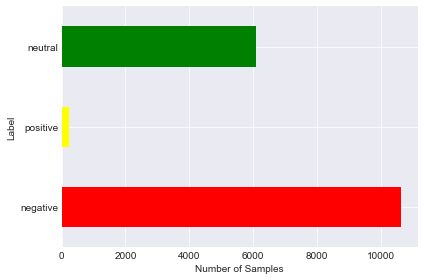

In [24]:
#check if the dataset is balanced:
plt.style.use('seaborn-darkgrid')
col = ['red', 'yellow', 'green']
ax = tweet['sentiment'].value_counts(sort=False).plot(kind='barh', color = col)
ax.set_xlabel('Number of Samples')
ax.set_ylabel('Label')
plt.tight_layout()

# MIHIR

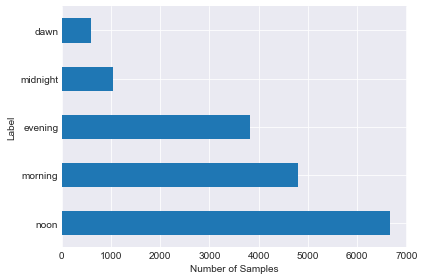

In [25]:
#check the frequency of dayparts:
plt.style.use('seaborn-darkgrid')
ax = tweet['dayparts'].value_counts().plot(kind='barh')
ax.set_xlabel('Number of Samples')
ax.set_ylabel('Label')
plt.tight_layout()

# MIHIR

In [26]:
#Check for the sentiments counts for daypart:
tweet[['dayparts', 'sentiment', 'text']].groupby(['dayparts','sentiment']).count()


text
dayparts sentiment      
dawn     negative    380
         neutral     215
evening  negative   2457
         neutral    1332
         positive     40
midnight negative    651
         neutral     377
         positive     11
morning  negative   3100
         neutral    1647
         positive     61
noon     negative   4040
         neutral    2508
         positive    130

In [27]:
df = tweet[['dayparts', 'sentiment', 'text']].groupby(['dayparts','sentiment']).count()

<Figure size 1440x720 with 0 Axes>

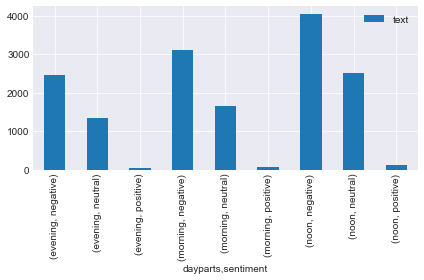

In [28]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20,10))
df[df.index.isin(['noon', 'morning', 'evening'], level=0)].plot(kind='bar')
plt.tight_layout()

# MIHIR

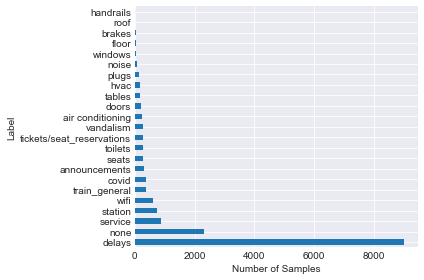

In [29]:
#check the frequency of topics in tweet:
plt.style.use('seaborn-darkgrid')
ax = tweet['topic'].value_counts().plot(kind='barh')
ax.set_xlabel('Number of Samples')
ax.set_ylabel('Label')
plt.tight_layout()

# MIHIR

In [31]:
#Clean tweets:
def clean_tweet(tweet): 
    ''' 
    Utility function to clean tweet text by removing special characters 
    using simple regex statements. 
    '''
    tweet = str(tweet)
    cleanTweet =  ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    return cleanTweet

#Remove web links:
def strip_links(text):
    text = str(text)
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], '')    
    return text


stop_words = set(stopwords.words('english'))

appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "i would",
"i'd" : "i had",
"i'll" : "i will",
"i'm" : "i am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "i have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}



# Load default stop words and add a few more specific to my text.
stopwordsList = stopwords.words('english')
stopwordsList.append('some')
stopwordsList.append('like')
stopwordsList.append('others')
stopwordsList.append('say')
stopwordsList.append('help')
stopwordsList.append('_help')
stopwordsList.append('train')
stopwordsList.append('would')
stopwordsList.append('please')
stopwordsList.append('use')
stopwordsList.append('love')
stopwordsList.append('go')
stopwordsList.append('see')
stopwordsList.append('seem')
stopwordsList.append('run')
stopwordsList.append('come')
stopwordsList.append('city')
stopwordsList.append('happen')
stopwordsList.append('great')
stopwordsList.append('think')
stopwordsList.append('say')
stopwordsList.append('train')
stopwordsList.append('would')
stopwordsList.append('let')
stopwordsList.append('people')
stopwordsList.append('one')
stopwordsList.append('tell')
stopwordsList.append('yet')
stopwordsList.append('yes')
stopwordsList.append('next')
stopwordsList.append('even')
stopwordsList.append('week')
stopwordsList.append('go')


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Admin/nltk_data'
    - 'C:\\Users\\Admin\\anaconda3\\nltk_data'
    - 'C:\\Users\\Admin\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Admin\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Admin\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
def text_preprocess(text):
    lemma = nltk.wordnet.WordNetLemmatizer()
    
    text = str(text)
    
    #removing mentions and hashtags
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", text).split())
    
    #remove http links from tweets 
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], '')  
    
    text_pattern = re.sub("`", "'", text)
    
    #fix misspelled words    
    text = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))
    
    
   # print(text_pattern)
    
    #Convert to lower and negation handling
    
    text_lr = text_pattern.lower()
    
   # print(text_lr)
    
    words = text_lr.split()
    text_neg = [appos[word] if word in appos else word for word in words]
    text_neg = " ".join(text_neg) 
   # print(text_neg)
    
    #remove stopwords
    tokens = word_tokenize(text_neg)
    text_nsw = [i for i in tokens if i not in stopwordsList]
    text_nsw = " ".join(text_nsw) 
        
    
    #remove tags
    
    text_tags=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text_nsw)

    # remove special characters and digits
    text_alpha=re.sub("(\\d|\\W)+"," ",text_tags)
    
    #Remove accented characters
    text = unidecode.unidecode(text_alpha)
    sent = TextBlob(text)
    tag_dict = {"J": 'a', 
                "N": 'n', 
                "V": 'v', 
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]    
    lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
   
    return " ".join(lemmatized_list)
    

# Creating a new column as "processed_text" from cleaning and processing the column "text"

In [ ]:
#Create preocessed text column in dataset:
tweet['processed_text'] = None

for i in range(len(tweet)):
    tweet.processed_text[i] = text_preprocess(tweet.text[i])

In [ ]:
#Check for the cleaned dataset:
tweet['processed_text'].head()

# MIHIR

# TO FIND THE MOST OCCURRING WORDS COUNTS

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Polarity ==  negative
train_s0 = tweet[tweet.sentiment == 'negative']
all_text = ' '.join(word for word in train_s0.processed_text)
wordcloud_neg = WordCloud(colormap='Reds', width=1000, height=1000, background_color='white').generate(all_text) #mode='RGBA'
plt.figure(figsize=(15,10))
plt.title('Negative Sentiment - Wordcloud')
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

#wordcloud_neg.to_file('negative_senti_wordcloud.jpg')

In [ ]:
# Polarity ==  neutral
train_s1 = tweet[tweet.sentiment == 'neutral']
all_text = ' '.join(word for word in train_s1.processed_text)
wordcloud_neu = WordCloud(width=1000, height=1000, colormap='Blues', background_color='white').generate(all_text)
plt.figure( figsize=(15,10))
plt.title('Neutral Sentiment - Wordcloud')
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

#wordcloud_neu.to_file('neutral_senti_wordcloud.jpg')

In [ ]:
# Polarity ==  positive
train_s2 = tweet[tweet.sentiment  == 'positive']
all_text = ' '.join(word for word in train_s2.processed_text)
wordcloud_pos = WordCloud(width=1000, height=1000, colormap='Wistia',background_color='white').generate(all_text)
plt.figure(figsize=(15,10))
plt.title('Positive Sentiment - Wordcloud')
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

#wordcloud_pos.to_file('positive_senti_wordcloud.jpg')

### wordcloud for frequently occuring bigrams

In [ ]:
# wordcloud for frequently occuring bigrams

import nltk
from string impor                                                   .stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [ ]:
WNL = nltk.WordNetLemmatizer()

In [ ]:
text_content = tweet['processed_text']

In [ ]:
# After the punctuation above is removed it still leaves empty entries in the list.
text_content = [s for s in text_content if len(s) != 0]

# Best to get the lemmas of each word to reduce the number of similar words
text_content = [WNL.lemmatize(t) for t in text_content]


bigrams_list = list(nltk.bigrams(text_content))
#print(bigrams_list)

dictionary2 = [' '.join(tup) for tup in bigrams_list]
#print (dictionary2)

vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#print (words_freq[:100])
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200

wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,stopwords=stopwordsList,background_color='white')

wordCloud.generate_from_frequencies(words_dict)

plt.figure(figsize=(15,10))
plt.title('Most frequently occurring bigrams connected by colour')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
# extracting hashtags from positive tweets

HT_positive = hashtag_extract(tweet['text'][tweet['sentiment'] == 'positive'])

# extracting hashtags from negative tweets
HT_negative = hashtag_extract(tweet['text'][tweet['sentiment'] == 'negative'])

# extracting hashtags from neutral tweets
HT_neutral = hashtag_extract(tweet['text'][tweet['sentiment'] == 'neutral'])


# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])
HT_neutral = sum(HT_neutral,[])

In [ ]:
# hashtags contributing to tweets

b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
plt.title('Hashtags contributing to negative tweets')
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
# hashtags contributing to neutral tweets

b = nltk.FreqDist(HT_neutral)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
plt.title('Hashtags contributing to neutral tweets')
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
# hashtags contributing to postive tweets

b = nltk.FreqDist(HT_positive)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
plt.title('Hashtags contributing to positive tweets')
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

# FEATURE ENGINEERING FOR MODEL BUILDING

In [ ]:
#Word frequency of text column, irrespective to sentiments:

from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(tweet['processed_text'])

top_sum=bow.toarray().sum(axis=0)
top_sum_cv=[top_sum]#to let pandas know that these are rows
columns_cv = bow_vectorizer.get_feature_names()
x_traincvdf = pd.DataFrame(top_sum_cv,columns=columns_cv)


import operator
dic_irr_sent = {}
for i in range(len(top_sum_cv[0])):
    dic_irr_sent[columns_cv[i]]=top_sum_cv[0][i]
sorted_dic_irr=sorted(dic_irr_sent.items(),reverse=True,key=operator.itemgetter(1))
print(sorted_dic_irr[1:])


In [ ]:
from matplotlib import pyplot as plt

sorted_dic_irr = sorted_dic_irr[:15]

xs, ys = [*zip(*sorted_dic_irr)]

sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
plt.xticks(rotation = 45)
plt.bar(xs, ys)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top words - Count Vectorizer')
plt.show()


### Modeling

* This models can help new tweets to analyize and classify negative sentiments.
* Once model classify sentiments of new text, we can do in-depth keyword-extraction from text
* These extracted keywords can solve our business challange of poor train service

In [ ]:
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec

### for classification, selecting sentiments as target: ['negative','neutral']

In [ ]:
#for classification, selecting sentiments: ['negative','neutral']
test = tweet.loc[tweet['sentiment'].isin(['negative','neutral'])]

In [ ]:
test['sentiment'].unique()

In [ ]:
    #For binary classification converting text into 1 and 0 
    target = {

        'negative': 1,
        'neutral': 0
    }

test['target'] = test['sentiment'].apply(lambda x: target[x])

In [ ]:
#SPLITTING THE TRAINING DATASET INTO TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(test["processed_text"], test["target"],test_size=0.2,shuffle=True)

In [ ]:
#Tf-Idf
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

#TRAINING
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  

#TESTING
#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_test_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]


In [ ]:
#Check for the score:
print(classification_report(y_test,y_predict))

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [ ]:
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [ ]:
unique_labels(y_test)
#combine these labels with the confusion metrix
def plot(y_true,y_pred):
    labels = unique_labels(y_test)
    column=[f'Predicted {label}' for label in labels]
    indexes=[f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true,y_pred), 
                         columns=column, index=indexes)
    
    return table

def plot2(y_true,y_pred):
    sns.set(rc={"figure.figsize":(8, 4)})
    labels = unique_labels(y_test)
    column=[f'Predicted {label}' for label in labels]
    indexes=[f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true,y_pred), 
                         columns=column, index=indexes)
    
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

In [ ]:
plot2(y_test, y_predict)

### Business KPI

As per our dataset and EDA we found that the extracted keyword from tweet:

* Delay
* thamslink
* time
* announcement
* cancel
* update
* seat

are the frequent in dataset. which helps to business to look into deeper for better service improvement

### Keyword Extraction

In [ ]:
stopwords_en = set(stopwords.words('english'))


def word_check(word, list):
    if word in list:
        return 1
    else:
        return 0
    
def word_cooccurance(word1,word2,candi_kw_lst):
    value = 0
    for k in range(len(candi_kw_lst)) :
        value  = value + check_both(word1,word2,candi_kw_lst[k])
    
    return value

def check_both(word1, word2 , list): 
    if word1 in list:
        if word2 in list:
            return 1
        else:
            return 0
    else:
        return 0
    
def word_freq(word,list1):
    return list1.count(word)


def extract_keywords(text):
    
    global key_name
    
    text = text.lower()
    
    text = clean_tweet(text)

    tokenized_sents = word_tokenize(text)
    
    candi_kw = []
    candi_kw_lst = []

    for i in tokenized_sents:

        if i not in stopwords_en:
            candi_kw.append(i)
        else:
            if len(candi_kw) == 0:
                pass 
            else:
                candi_kw_lst.append(candi_kw) 
                candi_kw = []
    candi_kw_lst.append(candi_kw)
    
    flat_list_keyword = [item for sublist in candi_kw_lst for item in sublist]
    flat_unique_keyword = set(flat_list_keyword)

    flat_unique_list = [] 

    # traverse for all elements 
    for x in flat_list_keyword: 
        # check if exists in unique_list or not 
        if x not in flat_unique_list: 
            flat_unique_list.append(x) 
            
    # initializing cooccurance matrix

    matrix_df = pd.DataFrame(0, columns=flat_unique_list, index=flat_unique_list)

    
    # creating co-occurance matrix

    j = 0

    for i in range(len(matrix_df)):
        for j in range(len(matrix_df.columns)):
            if (matrix_df.index[i] == matrix_df.columns[j]):
                matrix_df.iloc[i,j] = flat_list_keyword.count(matrix_df.index[j])
            else:
                value = 0
                for k in range(len(candi_kw_lst)) :
                    value  = value + check_both(matrix_df.index[i],matrix_df.columns[j],candi_kw_lst[k])
                matrix_df.iloc[i,j] = value

        # sum row wise and create column for word degree

    '''# find degree of word 

    Word Degree (deg(w)) = word_freq+ # howmany times a word has a interaction with other words

    '''

    matrix_df['degree'] = matrix_df.sum(axis=1)
    
    # word_frequency

    '''# find frequency of word

    Word Frequency (freq(w)) # how many times a particular word appeared among all candidate keywords.

    Keyword score = (deg(w)/freq(w))'''

    matrix_df['word_frequency'] = None

    for i in range(len(matrix_df)):

        matrix_df.word_frequency[i] = word_freq(matrix_df.index[i],flat_list_keyword)

    
        # calculate keyword score

    matrix_df['keyword_score'] = None

    for i in range(len(matrix_df)):

        matrix_df.keyword_score[i] = matrix_df.degree[i] / matrix_df.word_frequency[i]

   
    #getting keyword_score for each word

    matrix_dict = matrix_df.to_dict()['keyword_score']
    
    #calculate keyword score for candidate keywords
    
    candi_kw_score = {}

    for i in range(len(candi_kw_lst)):
        score = 0
        for j in range(len(candi_kw_lst[i])):
            key_name = str(candi_kw_lst[i])
            score = score + matrix_dict[candi_kw_lst[i][j]]
        candi_kw_score [key_name] = score


    candi_kw_score = {k: v for k, v in sorted(candi_kw_score.items(), key=lambda item: item[1],reverse=True)}
    
    # extract top 3 scored candidate keywords

    n_items = dict(itertools.islice(candi_kw_score.items(), 10)) 

    final_phrase = []

    for x in list(n_items)[0:7]:
        final_phrase.append(x)

    # removing special characters

    removetable = str.maketrans('', '', "@,#%[]'")
    out_list = [s.translate(removetable) for s in final_phrase]

    extracted_keywords = ' '.join(out_list)
    
    return extracted_keywords

In [ ]:
tweet['predicted_text'] = None

for i in range(len(tweet)):
    tweet.predicted_text[i] = extract_keywords(tweet.text[i])

In [ ]:
tweet[['text', 'processed_text', 'predicted_text']].head(10)